## EXPERIMENT 2.3: AdaFace

In [1]:
## Load libraries

import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import normalize
import sys
sns.set(style="white")
%matplotlib inline
sys.path.append('../../utils')
from Model_utils.Model_funcs import *
from Result_metric_utils.result_metrics import *
from Data_proc_utils.Data_proc_funcs import *
from Plotting_stats_utils.plotting_threshold import compute_metrics_ex_2_3, plot_threshold_metrics_ex_2_3
from Plotting_stats_utils.stats_tables import *


from IPython import embed


In [2]:
# Save figures
from matplotlib import pyplot as plt
save_fig_path = '../../figures/mag_2_3/'

### AdaFace Results

This notebook loads the feature vectors from MagFace and run them through the results metrics:
FNIR, FPIR, FND, FPD, and GARBE

In [3]:
feature_list_children = '../../data/data_full/feature_vectors/magface_feature_vectors/2.2/feature_vectors_from_children_filtered_bibel_FINAL_INFERENCE_finetuning_ex_2_2_ofsi_final.list'

# feature_list_children = '../../data/data_full/feature_vectors/magface_feature_vectors/1.1/feature_vectors_from_children_filtered_bibel_FINAL_INFERENCE_baseline_ex_1_1.list'


def load_and_compute_similarity(feature_list, dtype=np.float32):
    # Load data
    image_names, ids, num_ids, norm_feats = load_magface_vectors(feature_list)

    # Convert dtype to reduce memory usage
    norm_feats = norm_feats.astype(dtype)

    # Compute similarity matrix incrementally if possible
    sim_mat = np.dot(norm_feats, norm_feats.T)

    return image_names, ids, num_ids, sim_mat


In [4]:
# # feature_list_children = '../../data/data_full/feature_vectors/adaface_feature_vectors/2.2/similarity_scores_children_bibel_FINAL_INFERENCE_finetuning_2_2.pt'
# feature_list_children = '../../data/data_full/feature_vectors/adaface_feature_vectors/2.1/similarity_scores_children_filtered_bibel_FINAL_INFERENCE_finetuning_frozen_9_layers_2_1.pt'


# image_names_all, ids_all, num_ids_all, norm_feats_all = load_adaface_vectors(feature_list_children)


# # Similarity matrices from adaface - all
# sim_mat_all = np.dot(norm_feats_all, norm_feats_all.T)


# # Dataframes with info, removes names not in magface results
# children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_canonical_df_BIBLE.csv')
# children_all = children_all[children_all.image_name.isin(image_names_all)]



image_names_all, ids_all, num_ids_all, sim_mat_all = load_and_compute_similarity(feature_list_children)

# Dataframes with info, removes names not in magface results
# children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_children_df_BIBEL.csv')
children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_canonical_df_BIBLE.csv')
children_all = children_all[children_all.image_name.isin(image_names_all)]


/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_5.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_1.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_2.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_m.04n3v0_/m.04n3v0__0002.jpg
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_1.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_3.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_2.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_344/Asian_344_19.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_344/Asian_344_21.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_167/Caucasian_167_26.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_167/Caucasian_167_38.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_16

# Finding the right threshold

In [5]:
random_states = [1,2]
percentiles = np.arange(0.0, 1.0, 0.03).tolist()

df_all_threshold_x = compute_metrics_ex_2_3(random_states, percentiles, children_all, children_all, image_names_all, image_names_all, sim_mat_all, sim_mat_all, num_ids_all, num_ids_all, ids_all, ids_all, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, '1-3', '4-6')

# df_all_threshold_x = compute_metrics_ex_2_3(random_states, percentiles, children_all, children_all, image_names_all, image_names_all, sim_mat_all, sim_mat_all, num_ids_all, num_ids_all, ids_all, ids_all, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, '1-3', '4-6')

enrolled_sim_mat.shape[0]283
enrolled_sim_mat.shape[1]283
M_d_set_len283
neg_ref0.0
enrolled_sim_mat.shape[0]242
enrolled_sim_mat.shape[1]242
M_d_set_len242
neg_ref0.0
NEW FPD result:  1.0356209612339056
NEW FND result:  0.0
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.0


/Users/gabriellakierulff/Desktop/HCAI/speciale/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:32: RuntimeWarning: invalid value encountered in scalar divide
  FND_GARBE = (np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2))


enrolled_sim_mat.shape[0]283
enrolled_sim_mat.shape[1]283
M_d_set_len283
neg_ref0.0
enrolled_sim_mat.shape[0]242
enrolled_sim_mat.shape[1]242
M_d_set_len242
neg_ref0.0
NEW FPD result:  1.056722398018353
NEW FND result:  0.0
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.03
enrolled_sim_mat.shape[0]283
enrolled_sim_mat.shape[1]283
M_d_set_len283
neg_ref0.0
enrolled_sim_mat.shape[0]242
enrolled_sim_mat.shape[1]242
M_d_set_len242
neg_ref0.0
NEW FPD result:  1.0822797089321303
NEW FND result:  0.0
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.06
enrolled_sim_mat.shape[0]283
enrolled_sim_mat.shape[1]283
M_d_set_len283
neg_ref0.0
enrolled_sim_mat.shape[0]242
enrolled_sim_mat.shape[1]242
M_d_set_len242
neg_ref0.0
NEW FPD result:  1.117025285858098
NEW FND result:  0.0
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.09
enrolled_sim_mat.shap

/Users/gabriellakierulff/Desktop/HCAI/speciale/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:31: RuntimeWarning: invalid value encountered in scalar divide
  FPD_GARBE = (np.abs(fpir_c -fpir_a))/(2*(2**2)*((fpir_c+fpir_a)/2))


enrolled_sim_mat.shape[0]283
enrolled_sim_mat.shape[1]283
M_d_set_len283
neg_ref84.25952380952383
enrolled_sim_mat.shape[0]242
enrolled_sim_mat.shape[1]242
M_d_set_len242
neg_ref67.9047619047619
NEW FPD result:  0.0
NEW FND result:  1.0610789527118136
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.9299999999999999
enrolled_sim_mat.shape[0]283
enrolled_sim_mat.shape[1]283
M_d_set_len283
neg_ref87.25952380952381
enrolled_sim_mat.shape[0]242
enrolled_sim_mat.shape[1]242
M_d_set_len242
neg_ref70.40476190476188
NEW FPD result:  0.0
NEW FND result:  1.0598386054017501
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.96
enrolled_sim_mat.shape[0]283
enrolled_sim_mat.shape[1]283
M_d_set_len283
neg_ref87.25952380952381
enrolled_sim_mat.shape[0]242
enrolled_sim_mat.shape[1]242
M_d_set_len242
neg_ref70.40476190476188
NEW FPD result:  0.0
NEW FND result:  1.0598386054017501
NEW GARBE result, GARBE 

/Users/gabriellakierulff/Desktop/HCAI/speciale/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:32: RuntimeWarning: invalid value encountered in scalar divide
  FND_GARBE = (np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2))


enrolled_sim_mat.shape[0]290
enrolled_sim_mat.shape[1]290
M_d_set_len290
neg_ref0.0
enrolled_sim_mat.shape[0]245
enrolled_sim_mat.shape[1]245
M_d_set_len245
neg_ref0.0
NEW FPD result:  1.055722879539956
NEW FND result:  0.0
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.03
enrolled_sim_mat.shape[0]290
enrolled_sim_mat.shape[1]290
M_d_set_len290
neg_ref0.0
enrolled_sim_mat.shape[0]245
enrolled_sim_mat.shape[1]245
M_d_set_len245
neg_ref0.0
NEW FPD result:  1.0818959689239906
NEW FND result:  0.0
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.06
enrolled_sim_mat.shape[0]290
enrolled_sim_mat.shape[1]290
M_d_set_len290
neg_ref0.0
enrolled_sim_mat.shape[0]245
enrolled_sim_mat.shape[1]245
M_d_set_len245
neg_ref0.0
NEW FPD result:  1.1198129961449115
NEW FND result:  0.0
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.09
enrolled_sim_mat.sha

/Users/gabriellakierulff/Desktop/HCAI/speciale/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:31: RuntimeWarning: invalid value encountered in scalar divide
  FPD_GARBE = (np.abs(fpir_c -fpir_a))/(2*(2**2)*((fpir_c+fpir_a)/2))


enrolled_sim_mat.shape[0]290
enrolled_sim_mat.shape[1]290
M_d_set_len290
neg_ref86.96666666666671
enrolled_sim_mat.shape[0]245
enrolled_sim_mat.shape[1]245
M_d_set_len245
neg_ref71.7
NEW FPD result:  0.0
NEW FND result:  1.0247118421228558
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.87
enrolled_sim_mat.shape[0]290
enrolled_sim_mat.shape[1]290
M_d_set_len290
neg_ref89.30000000000005
enrolled_sim_mat.shape[0]245
enrolled_sim_mat.shape[1]245
M_d_set_len245
neg_ref72.50000000000001
NEW FPD result:  0.0
NEW FND result:  1.0405945303175306
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.8999999999999999
enrolled_sim_mat.shape[0]290
enrolled_sim_mat.shape[1]290
M_d_set_len290
neg_ref90.30000000000005
enrolled_sim_mat.shape[0]245
enrolled_sim_mat.shape[1]245
M_d_set_len245
neg_ref73.50000000000001
NEW FPD result:  0.0
NEW FND result:  1.0379310344792996
NEW GARBE result, GARBE close to 1 m

In [6]:
random_states = [1,2]
percentiles = np.arange(0.0, 1.0, 0.03).tolist()

df_all_threshold_x_1 = compute_metrics_ex_2_3(random_states, percentiles, children_all, children_all, image_names_all, image_names_all, sim_mat_all, sim_mat_all, num_ids_all, num_ids_all, ids_all, ids_all, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, '7-9', '10-12')


enrolled_sim_mat.shape[0]233
enrolled_sim_mat.shape[1]233
M_d_set_len233
neg_ref0.0
enrolled_sim_mat.shape[0]271
enrolled_sim_mat.shape[1]271
M_d_set_len271
neg_ref0.0
NEW FPD result:  1.0070115615549016
NEW FND result:  0.0
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.0


/Users/gabriellakierulff/Desktop/HCAI/speciale/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:32: RuntimeWarning: invalid value encountered in scalar divide
  FND_GARBE = (np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2))


enrolled_sim_mat.shape[0]233
enrolled_sim_mat.shape[1]233
M_d_set_len233
neg_ref0.0
enrolled_sim_mat.shape[0]271
enrolled_sim_mat.shape[1]271
M_d_set_len271
neg_ref0.0
NEW FPD result:  1.0109596717537639
NEW FND result:  0.0
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.03
enrolled_sim_mat.shape[0]233
enrolled_sim_mat.shape[1]233
M_d_set_len233
neg_ref0.0
enrolled_sim_mat.shape[0]271
enrolled_sim_mat.shape[1]271
M_d_set_len271
neg_ref0.0
NEW FPD result:  1.0114223980363346
NEW FND result:  0.0
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.06
enrolled_sim_mat.shape[0]233
enrolled_sim_mat.shape[1]233
M_d_set_len233
neg_ref0.0
enrolled_sim_mat.shape[0]271
enrolled_sim_mat.shape[1]271
M_d_set_len271
neg_ref0.0
NEW FPD result:  1.0095111292396206
NEW FND result:  0.0
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.09
enrolled_sim_mat.sh

/Users/gabriellakierulff/Desktop/HCAI/speciale/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:31: RuntimeWarning: invalid value encountered in scalar divide
  FPD_GARBE = (np.abs(fpir_c -fpir_a))/(2*(2**2)*((fpir_c+fpir_a)/2))


enrolled_sim_mat.shape[0]233
enrolled_sim_mat.shape[1]233
M_d_set_len233
neg_ref51.96666666666667
enrolled_sim_mat.shape[0]271
enrolled_sim_mat.shape[1]271
M_d_set_len271
neg_ref50.89047619047621
NEW FPD result:  0.0
NEW FND result:  1.1876862145634604
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.78
enrolled_sim_mat.shape[0]233
enrolled_sim_mat.shape[1]233
M_d_set_len233
neg_ref55.966666666666654
enrolled_sim_mat.shape[0]271
enrolled_sim_mat.shape[1]271
M_d_set_len271
neg_ref56.62380952380953
NEW FPD result:  0.0
NEW FND result:  1.1495919841221407
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.8099999999999999
enrolled_sim_mat.shape[0]233
enrolled_sim_mat.shape[1]233
M_d_set_len233
neg_ref58.29999999999998
enrolled_sim_mat.shape[0]271
enrolled_sim_mat.shape[1]271
M_d_set_len271
neg_ref57.1952380952381
NEW FPD result:  0.0
NEW FND result:  1.1855559442414831
NEW GARBE result, GARBE

/Users/gabriellakierulff/Desktop/HCAI/speciale/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:32: RuntimeWarning: invalid value encountered in scalar divide
  FND_GARBE = (np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2))


NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.0
enrolled_sim_mat.shape[0]233
enrolled_sim_mat.shape[1]233
M_d_set_len233
neg_ref0.0
enrolled_sim_mat.shape[0]269
enrolled_sim_mat.shape[1]269
M_d_set_len269
neg_ref0.0
NEW FPD result:  1.0053389501538554
NEW FND result:  0.0
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.03
enrolled_sim_mat.shape[0]233
enrolled_sim_mat.shape[1]233
M_d_set_len233
neg_ref0.0
enrolled_sim_mat.shape[0]269
enrolled_sim_mat.shape[1]269
M_d_set_len269
neg_ref0.0
NEW FPD result:  1.0088795432012032
NEW FND result:  0.0
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.06
enrolled_sim_mat.shape[0]233
enrolled_sim_mat.shape[1]233
M_d_set_len233
neg_ref0.0
enrolled_sim_mat.shape[0]269
enrolled_sim_mat.shape[1]269
M_d_set_len269
neg_ref0.0
NEW FPD result:  1.0120515940218546
NEW FND result:  0.0
NEW GARBE result, GA

/Users/gabriellakierulff/Desktop/HCAI/speciale/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:31: RuntimeWarning: invalid value encountered in scalar divide
  FPD_GARBE = (np.abs(fpir_c -fpir_a))/(2*(2**2)*((fpir_c+fpir_a)/2))


enrolled_sim_mat.shape[0]233
enrolled_sim_mat.shape[1]233
M_d_set_len233
neg_ref64.45238095238096
enrolled_sim_mat.shape[0]269
enrolled_sim_mat.shape[1]269
M_d_set_len269
neg_ref79.52857142857141
NEW FPD result:  0.0
NEW FND result:  1.068778864649664
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.9299999999999999
enrolled_sim_mat.shape[0]233
enrolled_sim_mat.shape[1]233
M_d_set_len233
neg_ref64.45238095238096
enrolled_sim_mat.shape[0]269
enrolled_sim_mat.shape[1]269
M_d_set_len269
neg_ref82.19523809523807
NEW FPD result:  0.0
NEW FND result:  1.1046160099825069
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.96
enrolled_sim_mat.shape[0]233
enrolled_sim_mat.shape[1]233
M_d_set_len233
neg_ref64.45238095238096
enrolled_sim_mat.shape[0]269
enrolled_sim_mat.shape[1]269
M_d_set_len269
neg_ref82.19523809523807
NEW FPD result:  0.0
NEW FND result:  1.1046160099825069
NEW GARBE result, GARBE 

In [7]:
random_states = [1,2]
percentiles = np.arange(0.0, 1.0, 0.03).tolist()

df_all_threshold_x_2 = compute_metrics_ex_2_3(random_states, percentiles, children_all, children_all, image_names_all, image_names_all, sim_mat_all, sim_mat_all, num_ids_all, num_ids_all, ids_all, ids_all, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, '13-15', '1-3')


enrolled_sim_mat.shape[0]335
enrolled_sim_mat.shape[1]335
M_d_set_len335
neg_ref0.0
enrolled_sim_mat.shape[0]283
enrolled_sim_mat.shape[1]283
M_d_set_len283
neg_ref0.0
NEW FPD result:  1.0290523785811454
NEW FND result:  0.0
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.0
enrolled_sim_mat.shape[0]335
enrolled_sim_mat.shape[1]335
M_d_set_len335
neg_ref0.0


/Users/gabriellakierulff/Desktop/HCAI/speciale/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:32: RuntimeWarning: invalid value encountered in scalar divide
  FND_GARBE = (np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2))


enrolled_sim_mat.shape[0]283
enrolled_sim_mat.shape[1]283
M_d_set_len283
neg_ref0.0
NEW FPD result:  1.054490132036931
NEW FND result:  0.0
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.03
enrolled_sim_mat.shape[0]335
enrolled_sim_mat.shape[1]335
M_d_set_len335
neg_ref0.0
enrolled_sim_mat.shape[0]283
enrolled_sim_mat.shape[1]283
M_d_set_len283
neg_ref0.0
NEW FPD result:  1.0851956264242344
NEW FND result:  0.0
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.06
enrolled_sim_mat.shape[0]335
enrolled_sim_mat.shape[1]335
M_d_set_len335
neg_ref0.0
enrolled_sim_mat.shape[0]283
enrolled_sim_mat.shape[1]283
M_d_set_len283
neg_ref0.0
NEW FPD result:  1.131962215270463
NEW FND result:  0.0
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.09
enrolled_sim_mat.shape[0]335
enrolled_sim_mat.shape[1]335
M_d_set_len335
neg_ref0.0
enrolled_sim_mat.shap

/Users/gabriellakierulff/Desktop/HCAI/speciale/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:31: RuntimeWarning: invalid value encountered in scalar divide
  FPD_GARBE = (np.abs(fpir_c -fpir_a))/(2*(2**2)*((fpir_c+fpir_a)/2))


enrolled_sim_mat.shape[0]283
enrolled_sim_mat.shape[1]283
M_d_set_len283
neg_ref80.09285714285716
NEW FPD result:  0.0
NEW FND result:  1.8397716534645003
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.87
enrolled_sim_mat.shape[0]335
enrolled_sim_mat.shape[1]335
M_d_set_len335
neg_ref54.366666666666696
enrolled_sim_mat.shape[0]283
enrolled_sim_mat.shape[1]283
M_d_set_len283
neg_ref81.59285714285716
NEW FPD result:  0.0
NEW FND result:  1.7765515190027605
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.8999999999999999
enrolled_sim_mat.shape[0]335
enrolled_sim_mat.shape[1]335
M_d_set_len335
neg_ref55.700000000000024
enrolled_sim_mat.shape[0]283
enrolled_sim_mat.shape[1]283
M_d_set_len283
neg_ref84.25952380952383
NEW FPD result:  0.0
NEW FND result:  1.7906972915239199
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.9299999999999999
enr

/Users/gabriellakierulff/Desktop/HCAI/speciale/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:32: RuntimeWarning: invalid value encountered in scalar divide
  FND_GARBE = (np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2))


enrolled_sim_mat.shape[0]290
enrolled_sim_mat.shape[1]290
M_d_set_len290
neg_ref0.0
NEW FPD result:  1.0473792481530728
NEW FND result:  0.0
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.03
enrolled_sim_mat.shape[0]339
enrolled_sim_mat.shape[1]339
M_d_set_len339
neg_ref0.0
enrolled_sim_mat.shape[0]290
enrolled_sim_mat.shape[1]290
M_d_set_len290
neg_ref0.0
NEW FPD result:  1.0784261083523363
NEW FND result:  0.0
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.06
enrolled_sim_mat.shape[0]339
enrolled_sim_mat.shape[1]339
M_d_set_len339
neg_ref0.0
enrolled_sim_mat.shape[0]290
enrolled_sim_mat.shape[1]290
M_d_set_len290
neg_ref0.0
NEW FPD result:  1.1285939084664651
NEW FND result:  0.0
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.09
enrolled_sim_mat.shape[0]339
enrolled_sim_mat.shape[1]339
M_d_set_len339
neg_ref0.0
enrolled_sim_mat.sh

/Users/gabriellakierulff/Desktop/HCAI/speciale/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:31: RuntimeWarning: invalid value encountered in scalar divide
  FPD_GARBE = (np.abs(fpir_c -fpir_a))/(2*(2**2)*((fpir_c+fpir_a)/2))


enrolled_sim_mat.shape[0]290
enrolled_sim_mat.shape[1]290
M_d_set_len290
neg_ref86.46666666666671
NEW FPD result:  0.0
NEW FND result:  1.5685837911585359
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.84
enrolled_sim_mat.shape[0]339
enrolled_sim_mat.shape[1]339
M_d_set_len339
neg_ref65.93809523809523
enrolled_sim_mat.shape[0]290
enrolled_sim_mat.shape[1]290
M_d_set_len290
neg_ref86.96666666666671
NEW FPD result:  0.0
NEW FND result:  1.541764804020334
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.87
enrolled_sim_mat.shape[0]339
enrolled_sim_mat.shape[1]339
M_d_set_len339
neg_ref68.60476190476192
enrolled_sim_mat.shape[0]290
enrolled_sim_mat.shape[1]290
M_d_set_len290
neg_ref89.30000000000005
NEW FPD result:  0.0
NEW FND result:  1.5215943877781128
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.8999999999999999
enrolled_sim_mat.sha

In [8]:
df_all_threshold_x

,Iteration,Percentile,FNIR_c,FNIR_a,FPIR_c,FPIR_a,FPD,FND,GARBE,Threshold
0,1,0.00,0.000000,0.000000,0.983184,0.949367,1.035621,0.000000,NaN,0.00
1,1,0.03,0.000000,0.000000,0.971017,0.918895,1.056722,0.000000,NaN,0.03
2,1,0.06,0.000000,0.000000,0.949918,0.877701,1.082280,0.000000,NaN,0.06
3,1,0.09,0.000000,0.000000,0.921020,0.824530,1.117025,0.000000,NaN,0.09
4,1,0.12,0.000000,0.000000,0.877214,0.754973,1.161915,0.000000,NaN,0.12
...,...,...,...,...,...,...,...,...,...,...
63,2,0.87,0.299885,0.292653,0.000000,0.000000,0.000000,1.024712,NaN,0.87
64,2,0.90,0.307931,0.295918,0.000000,0.000000,0.000000,1.040595,NaN,0.90
65,2,0.93,0.311379,0.300000,0.000000,0.000000,0.000000,1.037931,NaN,0.93
66,2,0.96,0.311379,0.304082,0.000000,0.000000,0.000000,1.023999,NaN,0.96


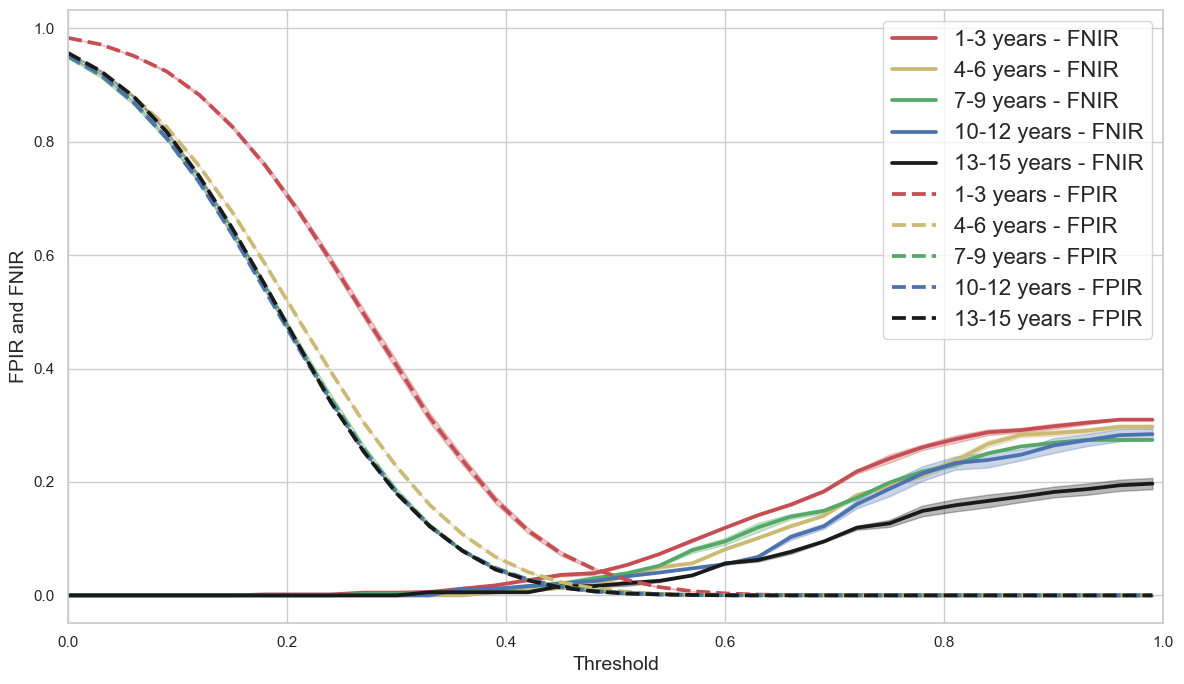

In [9]:
# plot_threshold_metrics_ex_2_3(df_all_threshold_x, df_all_threshold_x_1,df_all_threshold_x_2, save_fig_path )

def plot_threshold_metrics_ex_2_3_w_conf(df_all_threshold_x, df_all_threshold_x_1, df_all_threshold_x_2, save_fig_path):
    # Set the aesthetics for the plots
    sns.set(style="whitegrid")

    def calculate_ci(df, column):
        """Calculate the 95% confidence interval for a column in the DataFrame."""
        mean = df[column].mean()
        std = df[column].std()
        count = df[column].count()
        ci = 1.96 * (std / count**0.5)
        return mean, ci

    # Prepare the data with confidence intervals
    plot_df = df_all_threshold_x.groupby('Threshold').agg(['mean', 'std'])
    plot_df_1 = df_all_threshold_x_1.groupby('Threshold').agg(['mean', 'std'])
    plot_df_2 = df_all_threshold_x_2.groupby('Threshold').agg(['mean', 'std'])

    plt.figure(figsize=(12, 7))

    # Plot FNIR with confidence intervals
    plt.plot(plot_df.index, plot_df['FNIR_c']['mean'], 'r-', label='1-3 years - FNIR', linewidth=2.7)
    plt.fill_between(plot_df.index, plot_df['FNIR_c']['mean'] - 1.96 * plot_df['FNIR_c']['std'] / plot_df['FNIR_c']['mean'].count()**0.5,
                     plot_df['FNIR_c']['mean'] + 1.96 * plot_df['FNIR_c']['std'] / plot_df['FNIR_c']['mean'].count()**0.5, color='r', alpha=0.3)
    plt.plot(plot_df.index, plot_df['FNIR_a']['mean'], 'y-', label='4-6 years - FNIR', linewidth=2.7)
    plt.fill_between(plot_df.index, plot_df['FNIR_a']['mean'] - 1.96 * plot_df['FNIR_a']['std'] / plot_df['FNIR_a']['mean'].count()**0.5,
                     plot_df['FNIR_a']['mean'] + 1.96 * plot_df['FNIR_a']['std'] / plot_df['FNIR_a']['mean'].count()**0.5, color='y', alpha=0.3)
    plt.plot(plot_df_1.index, plot_df_1['FNIR_c']['mean'], 'g-', label='7-9 years - FNIR', linewidth=2.7)
    plt.fill_between(plot_df_1.index, plot_df_1['FNIR_c']['mean'] - 1.96 * plot_df_1['FNIR_c']['std'] / plot_df_1['FNIR_c']['mean'].count()**0.5,
                     plot_df_1['FNIR_c']['mean'] + 1.96 * plot_df_1['FNIR_c']['std'] / plot_df_1['FNIR_c']['mean'].count()**0.5, color='g', alpha=0.3)
    plt.plot(plot_df_1.index, plot_df_1['FNIR_a']['mean'], 'b-', label='10-12 years - FNIR', linewidth=2.7)
    plt.fill_between(plot_df_1.index, plot_df_1['FNIR_a']['mean'] - 1.96 * plot_df_1['FNIR_a']['std'] / plot_df_1['FNIR_a']['mean'].count()**0.5,
                     plot_df_1['FNIR_a']['mean'] + 1.96 * plot_df_1['FNIR_a']['std'] / plot_df_1['FNIR_a']['mean'].count()**0.5, color='b', alpha=0.3)
    plt.plot(plot_df_2.index, plot_df_2['FNIR_c']['mean'], 'k-', label='13-15 years - FNIR', linewidth=2.7)
    plt.fill_between(plot_df_2.index, plot_df_2['FNIR_c']['mean'] - 1.96 * plot_df_2['FNIR_c']['std'] / plot_df_2['FNIR_c']['mean'].count()**0.5,
                     plot_df_2['FNIR_c']['mean'] + 1.96 * plot_df_2['FNIR_c']['std'] / plot_df_2['FNIR_c']['mean'].count()**0.5, color='k', alpha=0.3)

    plt.xlabel('Threshold', fontsize=14)
    plt.ylabel('FNIR and FPIR', fontsize=14)
    # plt.title('FNIR vs Threshold', fontsize=16)
    plt.xlim(0.0, 1)
    plt.legend(fontsize=16)
    plt.grid(True)

    # Plot FPIR with confidence intervals
    plt.plot(plot_df.index, plot_df['FPIR_c']['mean'], 'r--', label='1-3 years - FPIR', linewidth=2.7)
    plt.fill_between(plot_df.index, plot_df['FPIR_c']['mean'] - 1.96 * plot_df['FPIR_c']['std'] / plot_df['FPIR_c']['mean'].count()**0.5,
                     plot_df['FPIR_c']['mean'] + 1.96 * plot_df['FPIR_c']['std'] / plot_df['FPIR_c']['mean'].count()**0.5, color='r', alpha=0.3)
    plt.plot(plot_df.index, plot_df['FPIR_a']['mean'], 'y--', label='4-6 years - FPIR', linewidth=2.7)
    plt.fill_between(plot_df.index, plot_df['FPIR_a']['mean'] - 1.96 * plot_df['FPIR_a']['std'] / plot_df['FPIR_a']['mean'].count()**0.5,
                     plot_df['FPIR_a']['mean'] + 1.96 * plot_df['FPIR_a']['std'] / plot_df['FPIR_a']['mean'].count()**0.5, color='y', alpha=0.3)
    plt.plot(plot_df_1.index, plot_df_1['FPIR_c']['mean'], 'g--', label='7-9 years - FPIR', linewidth=2.7)
    plt.fill_between(plot_df_1.index, plot_df_1['FPIR_c']['mean'] - 1.96 * plot_df_1['FPIR_c']['std'] / plot_df_1['FPIR_c']['mean'].count()**0.5,
                     plot_df_1['FPIR_c']['mean'] + 1.96 * plot_df_1['FPIR_c']['std'] / plot_df_1['FPIR_c']['mean'].count()**0.5, color='g', alpha=0.3)
    plt.plot(plot_df_1.index, plot_df_1['FPIR_a']['mean'], 'b--', label='10-12 years - FPIR', linewidth=2.7)
    plt.fill_between(plot_df_1.index, plot_df_1['FPIR_a']['mean'] - 1.96 * plot_df_1['FPIR_a']['std'] / plot_df_1['FPIR_a']['mean'].count()**0.5,
                     plot_df_1['FPIR_a']['mean'] + 1.96 * plot_df_1['FPIR_a']['std'] / plot_df_1['FPIR_a']['mean'].count()**0.5, color='b', alpha=0.3)
    plt.plot(plot_df_2.index, plot_df_2['FPIR_c']['mean'], 'k--', label='13-15 years - FPIR', linewidth=2.7)
    plt.fill_between(plot_df_2.index, plot_df_2['FPIR_c']['mean'] - 1.96 * plot_df_2['FPIR_c']['std'] / plot_df_2['FPIR_c']['mean'].count()**0.5,
                     plot_df_2['FPIR_c']['mean'] + 1.96 * plot_df_2['FPIR_c']['std'] / plot_df_2['FPIR_c']['mean'].count()**0.5, color='k', alpha=0.3)

    plt.xlabel('Threshold', fontsize=14)
    plt.ylabel('FPIR and FNIR', fontsize=14)
    # plt.title('FPIR and FNIR vs Threshold', fontsize=16)
    plt.xlim(0.0, 1)
    plt.legend(fontsize=16)
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(f'{save_fig_path}TH.png')

    # Show the plot
    plt.show()
plot_threshold_metrics_ex_2_3_w_conf(df_all_threshold_x, df_all_threshold_x_1,df_all_threshold_x_2, save_fig_path )

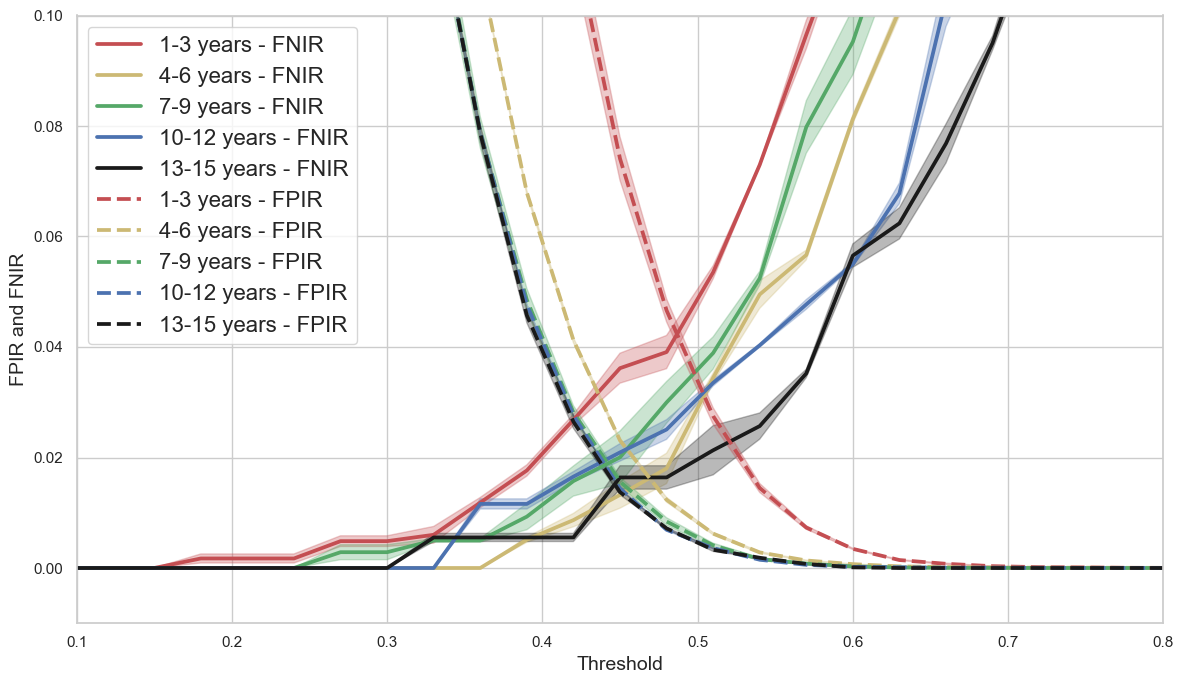

In [10]:

def plot_threshold_metrics_ex_2_3_w_conf_zoomed(df_all_threshold_x, df_all_threshold_x_1, df_all_threshold_x_2, save_fig_path):
    # Set the aesthetics for the plots
    sns.set(style="whitegrid")

    def calculate_ci(df, column):
        """Calculate the 95% confidence interval for a column in the DataFrame."""
        mean = df[column].mean()
        std = df[column].std()
        count = df[column].count()
        ci = 1.96 * (std / count**0.5)
        return mean, ci

    # Prepare the data with confidence intervals
    plot_df = df_all_threshold_x.groupby('Threshold').agg(['mean', 'std'])
    plot_df_1 = df_all_threshold_x_1.groupby('Threshold').agg(['mean', 'std'])
    plot_df_2 = df_all_threshold_x_2.groupby('Threshold').agg(['mean', 'std'])

    plt.figure(figsize=(12, 7))

    # Plot FNIR with confidence intervals
    plt.plot(plot_df.index, plot_df['FNIR_c']['mean'], 'r-', label='1-3 years - FNIR', linewidth=2.7)
    plt.fill_between(plot_df.index, plot_df['FNIR_c']['mean'] - 1.96 * plot_df['FNIR_c']['std'] / plot_df['FNIR_c']['mean'].count()**0.5,
                     plot_df['FNIR_c']['mean'] + 1.96 * plot_df['FNIR_c']['std'] / plot_df['FNIR_c']['mean'].count()**0.5, color='r', alpha=0.3)
    plt.plot(plot_df.index, plot_df['FNIR_a']['mean'], 'y-', label='4-6 years - FNIR', linewidth=2.7)
    plt.fill_between(plot_df.index, plot_df['FNIR_a']['mean'] - 1.96 * plot_df['FNIR_a']['std'] / plot_df['FNIR_a']['mean'].count()**0.5,
                     plot_df['FNIR_a']['mean'] + 1.96 * plot_df['FNIR_a']['std'] / plot_df['FNIR_a']['mean'].count()**0.5, color='y', alpha=0.3)
    plt.plot(plot_df_1.index, plot_df_1['FNIR_c']['mean'], 'g-', label='7-9 years - FNIR', linewidth=2.7)
    plt.fill_between(plot_df_1.index, plot_df_1['FNIR_c']['mean'] - 1.96 * plot_df_1['FNIR_c']['std'] / plot_df_1['FNIR_c']['mean'].count()**0.5,
                     plot_df_1['FNIR_c']['mean'] + 1.96 * plot_df_1['FNIR_c']['std'] / plot_df_1['FNIR_c']['mean'].count()**0.5, color='g', alpha=0.3)
    plt.plot(plot_df_1.index, plot_df_1['FNIR_a']['mean'], 'b-', label='10-12 years - FNIR', linewidth=2.7)
    plt.fill_between(plot_df_1.index, plot_df_1['FNIR_a']['mean'] - 1.96 * plot_df_1['FNIR_a']['std'] / plot_df_1['FNIR_a']['mean'].count()**0.5,
                     plot_df_1['FNIR_a']['mean'] + 1.96 * plot_df_1['FNIR_a']['std'] / plot_df_1['FNIR_a']['mean'].count()**0.5, color='b', alpha=0.3)
    plt.plot(plot_df_2.index, plot_df_2['FNIR_c']['mean'], 'k-', label='13-15 years - FNIR', linewidth=2.7)
    plt.fill_between(plot_df_2.index, plot_df_2['FNIR_c']['mean'] - 1.96 * plot_df_2['FNIR_c']['std'] / plot_df_2['FNIR_c']['mean'].count()**0.5,
                     plot_df_2['FNIR_c']['mean'] + 1.96 * plot_df_2['FNIR_c']['std'] / plot_df_2['FNIR_c']['mean'].count()**0.5, color='k', alpha=0.3)

    plt.xlabel('Threshold', fontsize=14)
    plt.ylabel('FNIR and FPIR', fontsize=14)
    # plt.title('FNIR vs Threshold', fontsize=16)
    plt.xlim(0.1, 0.8)
    plt.ylim(-0.01,0.1)
    plt.legend(fontsize=16)
    plt.grid(True)

    # Plot FPIR with confidence intervals
    plt.plot(plot_df.index, plot_df['FPIR_c']['mean'], 'r--', label='1-3 years - FPIR', linewidth=2.7)
    plt.fill_between(plot_df.index, plot_df['FPIR_c']['mean'] - 1.96 * plot_df['FPIR_c']['std'] / plot_df['FPIR_c']['mean'].count()**0.5,
                     plot_df['FPIR_c']['mean'] + 1.96 * plot_df['FPIR_c']['std'] / plot_df['FPIR_c']['mean'].count()**0.5, color='r', alpha=0.3)
    plt.plot(plot_df.index, plot_df['FPIR_a']['mean'], 'y--', label='4-6 years - FPIR', linewidth=2.7)
    plt.fill_between(plot_df.index, plot_df['FPIR_a']['mean'] - 1.96 * plot_df['FPIR_a']['std'] / plot_df['FPIR_a']['mean'].count()**0.5,
                     plot_df['FPIR_a']['mean'] + 1.96 * plot_df['FPIR_a']['std'] / plot_df['FPIR_a']['mean'].count()**0.5, color='y', alpha=0.3)
    plt.plot(plot_df_1.index, plot_df_1['FPIR_c']['mean'], 'g--', label='7-9 years - FPIR', linewidth=2.7)
    plt.fill_between(plot_df_1.index, plot_df_1['FPIR_c']['mean'] - 1.96 * plot_df_1['FPIR_c']['std'] / plot_df_1['FPIR_c']['mean'].count()**0.5,
                     plot_df_1['FPIR_c']['mean'] + 1.96 * plot_df_1['FPIR_c']['std'] / plot_df_1['FPIR_c']['mean'].count()**0.5, color='g', alpha=0.3)
    plt.plot(plot_df_1.index, plot_df_1['FPIR_a']['mean'], 'b--', label='10-12 years - FPIR', linewidth=2.7)
    plt.fill_between(plot_df_1.index, plot_df_1['FPIR_a']['mean'] - 1.96 * plot_df_1['FPIR_a']['std'] / plot_df_1['FPIR_a']['mean'].count()**0.5,
                     plot_df_1['FPIR_a']['mean'] + 1.96 * plot_df_1['FPIR_a']['std'] / plot_df_1['FPIR_a']['mean'].count()**0.5, color='b', alpha=0.3)
    plt.plot(plot_df_2.index, plot_df_2['FPIR_c']['mean'], 'k--', label='13-15 years - FPIR', linewidth=2.7)
    plt.fill_between(plot_df_2.index, plot_df_2['FPIR_c']['mean'] - 1.96 * plot_df_2['FPIR_c']['std'] / plot_df_2['FPIR_c']['mean'].count()**0.5,
                     plot_df_2['FPIR_c']['mean'] + 1.96 * plot_df_2['FPIR_c']['std'] / plot_df_2['FPIR_c']['mean'].count()**0.5, color='k', alpha=0.3)

    plt.xlabel('Threshold', fontsize=14)
    plt.ylabel('FPIR and FNIR', fontsize=14)
    # plt.title('FPIR and FNIR vs Threshold', fontsize=16)
    plt.xlim(0.1, 0.8)
    plt.ylim(-0.01,0.1)
    plt.legend(fontsize=16)
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(f'{save_fig_path}TH_zoomed.png')

    # Show the plot
    plt.show()
plot_threshold_metrics_ex_2_3_w_conf_zoomed(df_all_threshold_x, df_all_threshold_x_1,df_all_threshold_x_2, save_fig_path )

In [11]:
def balance_child_data_2_3(y_df, print_stats=False, random_state=42, age = '1-3'):
    """
    Input: raw df for children
    Returns: balanced csvs for different age groups of children
    """
    # Randomly sample 100 from each age group
    data = y_df[y_df['children_agegroup'] == age].sample(n=400, random_state=random_state, replace = True)


    return data

In [12]:
def evaluate_metrics_ex_2_3(random_states, children_all, adults_all, image_names_c, image_names_a, sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE,age_1, age_2, remove_ones, threshold_number, alpha_garbe=0.25):
    sim_mat_dict_all = {}
    FNIR_c_list = []
    FNIR_a_list = []
    FPIR_c_list = []
    FPIR_a_list = []
    FPD_list = []
    FND_list = []
    GARBE_list = []
    threshold_list = []

    for random_state_i in random_states:

        ### Load children and adults balanced data ###
        data_1 = balance_child_data_2_3(children_all, print_stats=False, random_state=random_state_i, age=age_1)
        data_2 = balance_child_data_2_3(children_all, print_stats=False, random_state=random_state_i, age=age_2)

        c_mates = data_1.groupby("identity_name").agg({'identity_name': ['count']})
        enrolled_identity_names_c = c_mates[c_mates[('identity_name', 'count')] > 1].index
        enrolled_image_names_c = list(data_1[data_1["identity_name"].isin(enrolled_identity_names_c)].image_name)
        non_enrolled_identity_names_c = c_mates[c_mates[('identity_name', 'count')] == 1].index
        non_enrolled_image_names_c = list(data_1[data_1["identity_name"].isin(non_enrolled_identity_names_c)].image_name)
        all_reference_image_names_c = list(data_1.image_name)

        a_mates = data_2.groupby("identity_name").agg({'identity_name': ['count']})
        enrolled_identity_names_a = a_mates[a_mates[('identity_name', 'count')] > 1].index
        enrolled_image_names_a = list(data_2[data_2["identity_name"].isin(enrolled_identity_names_a)].image_name)
        non_enrolled_identity_names_a = a_mates[a_mates[('identity_name', 'count')] == 1].index
        non_enrolled_image_names_a = list(data_2[data_2["identity_name"].isin(non_enrolled_identity_names_a)].image_name)
        all_reference_image_names_a = list(data_2.image_name)

        # Similarity matrices for ids in reference database
        indices_c_all_reference = [image_names_c.index(name) for name in all_reference_image_names_c]
        indices_a_all_reference = [image_names_a.index(name) for name in all_reference_image_names_a]

        # Extract corresponding columns from the similarity matrix
        sim_mat_c_reference_cols = sim_mat_c[:, indices_c_all_reference]
        sim_mat_a_reference_cols = sim_mat_a[:, indices_a_all_reference]

        # Extract corresponding rows from the numerical ids
        num_ids_c_reference = num_ids_c[indices_c_all_reference]
        num_ids_a_reference = num_ids_a[indices_a_all_reference]

        # Similarity matrices for non-enrolled ids
        indices_c_non_enrolled = [image_names_c.index(name) for name in non_enrolled_image_names_c]
        indices_a_non_enrolled = [image_names_a.index(name) for name in non_enrolled_image_names_a]

        sim_mat_c_non_enrolled_0 = sim_mat_c_reference_cols[indices_c_non_enrolled]
        sim_mat_a_non_enrolled_0 = sim_mat_a_reference_cols[indices_a_non_enrolled]

        num_ids_c_non_enrolled = num_ids_c[indices_c_non_enrolled]
        num_ids_a_non_enrolled = num_ids_a[indices_a_non_enrolled]

        # Similarity matrices for enrolled ids
        indices_c_enrolled = [image_names_c.index(name) for name in enrolled_image_names_c]
        indices_a_enrolled = [image_names_a.index(name) for name in enrolled_image_names_a]

        sim_mat_c_enrolled_0 = sim_mat_c[np.ix_(indices_c_enrolled, indices_c_enrolled)]
        sim_mat_a_enrolled_0 = sim_mat_a[np.ix_(indices_a_enrolled, indices_a_enrolled)]

        num_ids_c_enrolled = num_ids_c[indices_c_enrolled]
        num_ids_a_enrolled = num_ids_a[indices_a_enrolled]

        thold = threshold_number



        # Evaluation metrics
        FNIR_c, sim_mat_c_enrolled = compute_fnir(sim_mat_c_enrolled_0, sim_mat_c, enrolled_identity_names_c, num_ids_c_enrolled, ids_c, thold=thold)
        FNIR_a, sim_mat_a_enrolled = compute_fnir(sim_mat_a_enrolled_0, sim_mat_a, enrolled_identity_names_a, num_ids_a_enrolled, ids_a, thold=thold)

        FPIR_c = compute_fpir(sim_mat_c_non_enrolled_0, num_ids_c_non_enrolled, num_ids_c_reference, thold=thold)
        FPIR_a = compute_fpir(sim_mat_a_non_enrolled_0, num_ids_a_non_enrolled, num_ids_a_reference, thold=thold)

        alpha_garbe = 0.25
        FPD_i, FND_i, GARBE_i = GARBE(FNIR_c, FNIR_a, FPIR_c, FPIR_a, alpha=alpha_garbe)

        FNIR_c_list.append(FNIR_c)
        FNIR_a_list.append(FNIR_a)
        FPIR_c_list.append(FPIR_c)
        FPIR_a_list.append(FPIR_a)
        FPD_list.append(FPD_i)
        FND_list.append(FND_i)
        GARBE_list.append(GARBE_i)
        threshold_list.append(thold)

        sim_mat_dict_all[f'sim_mat_c_enrolled_iteration_{random_state_i}'] = sim_mat_c_enrolled
        sim_mat_dict_all[f'sim_mat_a_enrolled_iteration_{random_state_i}'] = sim_mat_a_enrolled
        sim_mat_dict_all[f'sim_mat_c_non_enrolled_iteration_{random_state_i}'] = remove_ones(sim_mat_c_non_enrolled_0)
        sim_mat_dict_all[f'sim_mat_a_non_enrolled_iteration_{random_state_i}'] = remove_ones(sim_mat_a_non_enrolled_0)

        print("done")


    data = {
        'Iteration': random_states,
        'FNIR_c': FNIR_c_list,
        'FNIR_a': FNIR_a_list,
        'FPIR_c': FPIR_c_list,
        'FPIR_a': FPIR_a_list,
        'FPD': FPD_list,
        'FND': FND_list,
        'GARBE': GARBE_list,
        'Threshold': threshold_list
    }

    df_all_results = pd.DataFrame(data)
    return df_all_results, sim_mat_dict_all

In [13]:
random_states = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

df_all_results_1, sim_mat_dict_all_magface_ex2_3_1 = evaluate_metrics_ex_2_3(
    random_states, children_all, children_all, image_names_all, image_names_all,
    sim_mat_all, sim_mat_all, num_ids_all, num_ids_all, ids_all, ids_all, balance_child_data,
    balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, '1-3', '4-6' , remove_ones, df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
)

df_all_results_1.rename(columns={
    'FNIR_c': 'FNIR_1_3',
    'FNIR_a': 'FNIR_4_6',
    'FPIR_c': 'FPIR_1_3',
    'FPIR_a': 'FPIR_4_6'
}, inplace=True)

# Dropping columns
df_all_results_1.drop(columns=['FPD', 'FND', 'GARBE', 'Threshold'], inplace=True)


df_all_results_1.describe().applymap(lambda x: f"{x:.3f}")

enrolled_sim_mat.shape[0]283
enrolled_sim_mat.shape[1]283
M_d_set_len283
neg_ref12.849999999999998
enrolled_sim_mat.shape[0]242
enrolled_sim_mat.shape[1]242
M_d_set_len242
neg_ref5.761904761904761
NEW FPD result:  3.688424840457354
NEW FND result:  1.9070671377290906
NEW GARBE result, GARBE close to 1 means more unfair:  0.09434260479460885
done
enrolled_sim_mat.shape[0]290
enrolled_sim_mat.shape[1]290
M_d_set_len290
neg_ref9.5
enrolled_sim_mat.shape[0]245
enrolled_sim_mat.shape[1]245
M_d_set_len245
neg_ref3.0
NEW FPD result:  3.8475055429470686
NEW FND result:  2.6752873561033574
NEW GARBE result, GARBE close to 1 means more unfair:  0.1221807034522997
done
enrolled_sim_mat.shape[0]297
enrolled_sim_mat.shape[1]297
M_d_set_len297
neg_ref10.833333333333334
enrolled_sim_mat.shape[0]245
enrolled_sim_mat.shape[1]245
M_d_set_len245
neg_ref8.333333333333334
NEW FPD result:  3.1483674057403217
NEW FND result:  1.0723905723590441
NEW GARBE result, GARBE close to 1 means more unfair:  0.0389172

/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_13785/1094775324.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_all_results_1.describe().applymap(lambda x: f"{x:.3f}")


,Iteration,FNIR_1_3,FNIR_4_6,FPIR_1_3,FPIR_4_6
count,10.000,10.000,10.000,10.000,10.000
mean,5.500,0.031,0.023,0.046,0.012
std,3.028,0.009,0.010,0.005,0.001
min,1.000,0.013,0.011,0.038,0.010
25%,3.250,0.028,0.015,0.043,0.011
50%,5.500,0.034,0.023,0.047,0.012
75%,7.750,0.036,0.033,0.051,0.013
max,10.000,0.045,0.036,0.053,0.014


In [14]:
random_states = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

df_all_results_2, sim_mat_dict_all_magface_ex2_3_2 = evaluate_metrics_ex_2_3(
    random_states, children_all, children_all, image_names_all, image_names_all,
    sim_mat_all, sim_mat_all, num_ids_all, num_ids_all, ids_all, ids_all, balance_child_data,
    balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, '7-9', '10-12' , remove_ones, 0.390
)
df_all_results_2.rename(columns={
    'FNIR_c': 'FNIR_7_9',
    'FNIR_a': 'FNIR_10_12',
    'FPIR_c': 'FPIR_7_9',
    'FPIR_a': 'FPIR_10_12'
}, inplace=True)

# Dropping columns
df_all_results_2.drop(columns=['FPD', 'FND', 'GARBE', 'Threshold'], inplace=True)


df_all_results_2.describe().applymap(lambda x: f"{x:.3f}")

enrolled_sim_mat.shape[0]233
enrolled_sim_mat.shape[1]233
M_d_set_len233
neg_ref1.0
enrolled_sim_mat.shape[0]271
enrolled_sim_mat.shape[1]271
M_d_set_len271
neg_ref3.666666666666666
NEW FPD result:  1.0816706045107753
NEW FND result:  3.1525215244807137
NEW GARBE result, GARBE close to 1 means more unfair:  0.09964549933194725
done
enrolled_sim_mat.shape[0]233
enrolled_sim_mat.shape[1]233
M_d_set_len233
neg_ref3.3333333333333335
enrolled_sim_mat.shape[0]269
enrolled_sim_mat.shape[1]269
M_d_set_len269
neg_ref2.5999999999999996
NEW FPD result:  1.1119611139514065
NEW FND result:  1.4801364585240941
NEW GARBE result, GARBE close to 1 means more unfair:  0.039611946430052454
done
enrolled_sim_mat.shape[0]227
enrolled_sim_mat.shape[1]227
M_d_set_len227
neg_ref0.8
enrolled_sim_mat.shape[0]290
enrolled_sim_mat.shape[1]290
M_d_set_len290
neg_ref1.3333333333333333
NEW FPD result:  1.239118457271153
NEW FND result:  1.3045977007792455
NEW GARBE result, GARBE close to 1 means more unfair:  0.0314

/Users/gabriellakierulff/Desktop/HCAI/speciale/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:32: RuntimeWarning: invalid value encountered in scalar divide
  FND_GARBE = (np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2))


enrolled_sim_mat.shape[0]225
enrolled_sim_mat.shape[1]225
M_d_set_len225
neg_ref3.1666666666666665
enrolled_sim_mat.shape[0]274
enrolled_sim_mat.shape[1]274
M_d_set_len274
neg_ref1.3333333333333335
NEW FPD result:  1.0777031050386303
NEW FND result:  2.89222222162787
NEW GARBE result, GARBE close to 1 means more unfair:  0.093491420872657
done
enrolled_sim_mat.shape[0]236
enrolled_sim_mat.shape[1]236
M_d_set_len236
neg_ref0.0
enrolled_sim_mat.shape[0]266
enrolled_sim_mat.shape[1]266
M_d_set_len266
neg_ref2.933333333333334
NEW FPD result:  1.1410626902236607
NEW FND result:  11027568922.305767
NEW GARBE result, GARBE close to 1 means more unfair:  0.19161777673799196
done
enrolled_sim_mat.shape[0]247
enrolled_sim_mat.shape[1]247
M_d_set_len247
neg_ref3.833333333333333
enrolled_sim_mat.shape[0]287
enrolled_sim_mat.shape[1]287
M_d_set_len287
neg_ref2.0
NEW FPD result:  1.0022254052074113
NEW FND result:  2.2270580293700255
NEW GARBE result, GARBE close to 1 means more unfair:  0.071364552

/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_13785/2133869302.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_all_results_2.describe().applymap(lambda x: f"{x:.3f}")


,Iteration,FNIR_7_9,FNIR_10_12,FPIR_7_9,FPIR_10_12
count,10.000,10.000,10.000,10.000,10.000
mean,5.500,0.009,0.007,0.053,0.050
std,3.028,0.008,0.005,0.006,0.003
min,1.000,0.000,0.000,0.043,0.047
25%,3.250,0.004,0.005,0.050,0.048
50%,5.500,0.009,0.007,0.053,0.049
75%,7.750,0.014,0.011,0.056,0.052
max,10.000,0.021,0.014,0.063,0.054


In [15]:
df_all_results_3, sim_mat_dict_all_magface_ex2_3_3 = evaluate_metrics_ex_2_3(
    random_states, children_all, children_all, image_names_all, image_names_all,
    sim_mat_all, sim_mat_all, num_ids_all, num_ids_all, ids_all, ids_all, balance_child_data,
    balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, '13-15', '1-3' , remove_ones, 0.390
)



df_all_results_3.rename(columns={
    'FNIR_c': 'FNIR_13_15',
    'FPIR_c': 'FPIR_13_15',
}, inplace=True)

# Dropping columns
df_all_results_3.drop(columns=['FNIR_a','FPIR_a','FPD', 'FND', 'GARBE', 'Threshold'], inplace=True)


enrolled_sim_mat.shape[0]335
enrolled_sim_mat.shape[1]335
M_d_set_len335
neg_ref1.3333333333333333
enrolled_sim_mat.shape[0]283
enrolled_sim_mat.shape[1]283
M_d_set_len283
neg_ref5.6000000000000005
NEW FPD result:  3.6063691723228737
NEW FND result:  4.971731447514103
NEW GARBE result, GARBE close to 1 means more unfair:  0.16006780201790255
done
enrolled_sim_mat.shape[0]339
enrolled_sim_mat.shape[1]339
M_d_set_len339
neg_ref2.4
enrolled_sim_mat.shape[0]290
enrolled_sim_mat.shape[1]290
M_d_set_len290
neg_ref4.5
NEW FPD result:  3.759264105842009
NEW FND result:  2.191810344517993
NEW GARBE result, GARBE close to 1 means more unfair:  0.10624725164751968
done
enrolled_sim_mat.shape[0]330
enrolled_sim_mat.shape[1]330
M_d_set_len330
neg_ref1.0
enrolled_sim_mat.shape[0]297
enrolled_sim_mat.shape[1]297
M_d_set_len297
neg_ref5.233333333333334
NEW FPD result:  3.0814210061130876
NEW FND result:  5.814814812895927
NEW GARBE result, GARBE close to 1 means more unfair:  0.1643462379915897
done
e

In [16]:
df_all_results = pd.concat([df_all_results_1,df_all_results_2,df_all_results_3], axis=1)

In [17]:
df_all_results.describe().applymap(lambda x: f"{x:.3f}")


/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_13785/1142005554.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_all_results.describe().applymap(lambda x: f"{x:.3f}")


,Iteration,FNIR_1_3,FNIR_4_6,FPIR_1_3,FPIR_4_6,Iteration,FNIR_7_9,FNIR_10_12,FPIR_7_9,FPIR_10_12,Iteration,FNIR_13_15,FPIR_13_15
count,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000
mean,5.500,0.031,0.023,0.046,0.012,5.500,0.009,0.007,0.053,0.050,5.500,0.003,0.048
std,3.028,0.009,0.010,0.005,0.001,3.028,0.008,0.005,0.006,0.003,3.028,0.002,0.003
min,1.000,0.013,0.011,0.038,0.010,1.000,0.000,0.000,0.043,0.047,1.000,0.000,0.043
25%,3.250,0.028,0.015,0.043,0.011,3.250,0.004,0.005,0.050,0.048,3.250,0.003,0.046
50%,5.500,0.034,0.023,0.047,0.012,5.500,0.009,0.007,0.053,0.049,5.500,0.004,0.048
75%,7.750,0.036,0.033,0.051,0.013,7.750,0.014,0.011,0.056,0.052,7.750,0.004,0.049
max,10.000,0.045,0.036,0.053,0.014,10.000,0.021,0.014,0.063,0.054,10.000,0.007,0.053


In [18]:

# Define age categories for FNIR columns
age_categories = ['FNIR_1_3', 'FNIR_4_6', 'FNIR_7_9', 'FNIR_10_12', 'FNIR_13_15']

# Initialize an empty dictionary to store FND values
fnd_values = {}

# Calculate FND between each pair of age categories
for i in range(len(age_categories)):
    for j in range(len(age_categories)):
        if i != j:
            category_pair = f"{age_categories[i]} vs {age_categories[j]}"
            fnir_i = df_all_results[age_categories[i]].replace(0, 1e-19)  # Replace zeroes with a small number
            fnir_j = df_all_results[age_categories[j]].replace(0, 1e-19)  # Replace zeroes with a small number
            # Ensure the smaller value is the numerator and the larger value is the denominator
            fnd_values[category_pair] = (fnir_i / fnir_j).apply(lambda x: min(x, 1/x)).mean()

# Convert the dictionary to a DataFrame for better visualization
df_fnd_values = pd.DataFrame(list(fnd_values.items()), columns=['Category Pair', 'FND'])
df_fnd_values = df_fnd_values.sort_values(by='FND').reset_index(drop=True)

# Display the FND values
print(df_fnd_values)

               Category Pair       FND
0     FNIR_1_3 vs FNIR_13_15  0.120479
1     FNIR_13_15 vs FNIR_1_3  0.120479
2     FNIR_13_15 vs FNIR_4_6  0.198949
3     FNIR_4_6 vs FNIR_13_15  0.198949
4     FNIR_1_3 vs FNIR_10_12  0.255170
5     FNIR_10_12 vs FNIR_1_3  0.255170
6       FNIR_7_9 vs FNIR_1_3  0.288076
7       FNIR_1_3 vs FNIR_7_9  0.288076
8     FNIR_13_15 vs FNIR_7_9  0.307070
9     FNIR_7_9 vs FNIR_13_15  0.307070
10    FNIR_4_6 vs FNIR_10_12  0.367762
11    FNIR_10_12 vs FNIR_4_6  0.367762
12      FNIR_7_9 vs FNIR_4_6  0.380080
13      FNIR_4_6 vs FNIR_7_9  0.380080
14    FNIR_7_9 vs FNIR_10_12  0.460285
15    FNIR_10_12 vs FNIR_7_9  0.460285
16  FNIR_13_15 vs FNIR_10_12  0.484845
17  FNIR_10_12 vs FNIR_13_15  0.484845
18      FNIR_4_6 vs FNIR_1_3  0.716149
19      FNIR_1_3 vs FNIR_4_6  0.716149


In [19]:
df_all_results.to_csv('df_all_results_ada_2_3.csv', index=False)


# Stats

In [20]:
import pandas as pd
df_all_results = pd.read_csv('df_all_results_ada_2_3.csv')

In [21]:
df_all_results

,Iteration,FNIR_1_3,FNIR_4_6,FPIR_1_3,FPIR_4_6,Iteration.1,FNIR_7_9,FNIR_10_12,FPIR_7_9,FPIR_10_12,Iteration.2,FNIR_13_15,FPIR_13_15
0,1,0.045406,0.023810,0.042242,0.011453,1,0.004292,0.013530,0.044167,0.047774,1,0.003980,0.042915
1,2,0.032759,0.012245,0.051014,0.013259,2,0.014306,0.009665,0.052887,0.047562,2,0.007080,0.048523
2,3,0.036476,0.034014,0.037570,0.011933,3,0.003524,0.004598,0.042549,0.052723,3,0.003030,0.047261
3,4,0.029110,0.022222,0.037896,0.014052,4,0.004219,0.000000,0.058705,0.052457,4,0.000000,0.046231
4,5,0.013002,0.011382,0.050593,0.012238,5,0.021226,0.011070,0.063223,0.051835,5,0.003980,0.048737
5,6,0.036544,0.014706,0.050428,0.009839,6,0.014556,0.007674,0.050521,0.050269,6,0.004545,0.049159
6,7,0.027304,0.015840,0.045792,0.010771,7,0.000000,0.000000,0.056111,0.048547,7,0.004167,0.053289
7,8,0.035407,0.034578,0.047619,0.013761,8,0.014074,0.004866,0.050397,0.046764,8,0.004065,0.044173
8,9,0.034496,0.035792,0.053177,0.011439,9,0.000000,0.011028,0.054038,0.047357,9,0.004141,0.047683
9,10,0.022184,0.028844,0.045136,0.009847,10,0.015520,0.006969,0.053860,0.053741,10,0.000000,0.048687


In [22]:
import scipy.stats as stats
import pandas as pd
import sys
%matplotlib inline
sys.path.append('../../utils')


In [23]:

# Function to compute the smallest FNIR over the biggest FNIR
def compute_fnd(column1, column2):
    return df_all_results[[column1, column2]].max(axis=1) / df_all_results[[column1, column2]].min(axis=1)

# List of FNIR columns
fnir_columns = ["FNIR_1_3", "FNIR_4_6", "FNIR_7_9", "FNIR_10_12", "FNIR_13_15"]

# Creating the new DataFrame with all combinations of FNIR columns
combinations = {}
for i in range(len(fnir_columns)):
    for j in range(i + 1, len(fnir_columns)):
        col1 = fnir_columns[i]
        col2 = fnir_columns[j]
        combinations[f"FND_{col1.split('_')[1]}_{col1.split('_')[2]}_{col2.split('_')[1]}_{col2.split('_')[2]}"] = compute_fnd(col1, col2)

# Creating the new DataFrame
df_new = pd.DataFrame(combinations)


# Print the new DataFrame
print(df_new)


   FND_1_3_4_6  FND_1_3_7_9  FND_1_3_10_12  FND_1_3_13_15  FND_4_6_7_9  \
0     1.907067    10.579682       3.355943      11.408348     5.547619   
1     2.675287     2.289828       3.389257       4.627155     1.168336   
2     1.072391    10.350028       7.933502      12.037037     9.651361   
3     1.309932     6.898973            inf            inf     5.266667   
4     1.142351     1.632450       1.174547       3.266844     1.864830   
5     2.484985     2.510566       4.762126       8.039657     1.010294   
6     1.723698          inf            inf       6.552901          inf   
7     1.023982     2.515789       7.276222       8.710222     2.456868   
8     1.037582          inf       3.128154       8.330769          inf   
9     1.300178     1.429441       3.183447            inf     1.858527   

   FND_4_6_10_12  FND_4_6_13_15  FND_7_9_10_12  FND_7_9_13_15  FND_10_12_13_15  
0       1.759740       5.982143       3.152522       1.078326         3.399446  
1       1.266876       

In [24]:
# if inf replace with mean of the other numbers in that column
import pandas as pd
import numpy as np

# Replace inf values with the mean of the other values in the column
for column in df_new.columns:
    mean_value = df_new[df_new[column] != np.inf][column].mean()
    df_new[column] = df_new[column].replace(np.inf, mean_value)

# Print the updated DataFrame
print(df_new)

# if inf replace with mean of the other numbers in that column
import pandas as pd
import numpy as np

# Replace inf values with the mean of the other values in the column
for column in df_new.columns:
    mean_value = df_new[df_new[column] != np.nan][column].mean()
    df_new[column] = df_new[column].replace(np.nan, mean_value)

# Print the updated DataFrame
print(df_new)


   FND_1_3_4_6  FND_1_3_7_9  FND_1_3_10_12  FND_1_3_13_15  FND_4_6_7_9  \
0     1.907067    10.579682       3.355943      11.408348     5.547619   
1     2.675287     2.289828       3.389257       4.627155     1.168336   
2     1.072391    10.350028       7.933502      12.037037     9.651361   
3     1.309932     6.898973       4.275400       7.871617     5.266667   
4     1.142351     1.632450       1.174547       3.266844     1.864830   
5     2.484985     2.510566       4.762126       8.039657     1.010294   
6     1.723698     4.775844       4.275400       6.552901     3.603063   
7     1.023982     2.515789       7.276222       8.710222     2.456868   
8     1.037582     4.775844       3.128154       8.330769     3.603063   
9     1.300178     1.429441       3.183447       7.871617     1.858527   

   FND_4_6_10_12  FND_4_6_13_15  FND_7_9_10_12  FND_7_9_13_15  FND_10_12_13_15  
0       1.759740       5.982143       3.152522       1.078326         3.399446  
1       1.266876       

In [25]:
df_new.describe().applymap(lambda x: f"{x:.3f}")

/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_13785/1908750352.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_new.describe().applymap(lambda x: f"{x:.3f}")


,FND_1_3_4_6,FND_1_3_7_9,FND_1_3_10_12,FND_1_3_13_15,FND_4_6_7_9,FND_4_6_10_12,FND_4_6_13_15,FND_7_9_10_12,FND_7_9_13_15,FND_10_12_13_15
count,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000
mean,1.568,4.776,4.275,7.872,3.603,3.482,5.748,2.124,2.710,2.087
std,0.610,3.444,2.010,2.672,2.649,2.244,2.993,0.562,1.212,0.694
min,1.024,1.429,1.175,3.267,1.010,1.028,1.730,1.305,1.078,1.197
25%,1.090,2.345,3.227,6.883,1.860,1.799,3.377,1.902,2.193,1.560
50%,1.305,3.646,3.832,7.956,3.030,3.364,5.748,2.124,2.710,2.087
75%,1.861,6.368,4.640,8.615,4.851,3.975,7.875,2.201,3.079,2.519
max,2.675,10.580,7.934,12.037,9.651,7.398,11.224,3.153,5.333,3.399


In [26]:
young = pd.concat([df_new.FND_1_3_4_6 , df_new.FND_1_3_7_9], ignore_index=True)

old = pd.concat([df_new.FND_4_6_13_15 , df_new.FND_7_9_13_15], ignore_index=True)

In [27]:
# # Load data
young = df_new.FND_4_6_7_9
old = df_new.FND_1_3_13_15

# List of FND values
fnd_values = [young, old]

for fnd_data in fnd_values:
    # print(fnd_data)
    # Calculate the mean and standard deviation
    mean_fnd = np.mean(fnd_data)
    std_fnd = np.std(fnd_data, ddof=1)  # sample standard deviation

    # Compute the confidence interval
    confidence_level = 0.95
    degrees_freedom = len(fnd_data) - 1
    confidence_interval = stats.t.interval(confidence_level, degrees_freedom, mean_fnd, std_fnd / np.sqrt(len(fnd_data)))

    print(f"Mean: {mean_fnd}, Std Dev: {std_fnd}, Confidence Interval: {confidence_interval}")


Mean: 3.603062713215972, Std Dev: 2.6491035594636116, Confidence Interval: (1.7080081872753847, 5.498117239156559)
Mean: 7.8716166962115866, Std Dev: 2.6723062564221793, Confidence Interval: (5.959963960764133, 9.78326943165904)


In [28]:
t_statistic, p_value = stats.ttest_ind(young, old)

t_statistic, p_value

(-3.587277233432307, 0.0021059601109109207)

# DENNE SKAL OPDATERES

In [29]:
FND_1_3 = [1, 1.680,1.784,1.666, 3.396  ]
FND_4_6 = [1.680, 1,1.508, 1.674, 2.946 ]
FND_7_9 = [1.784,1.508, 1,2.039, 2.495  ]
FND_10_12=[1.666, 1.674, 2.039, 1,2.980 ]
FND_13_15=[3.396, 2.946,2.495, 2.980, 1 ]

# FND_1_3 = [1, 2.932,2.495,2.598	, 3.043  ]
# FND_4_6 = [2.932, 1, 2.259, 1.963,2.036  ]
# FND_7_9 = [2.495, 2.259, 1, 2.524, 2.895  ]
# FND_10_12=[2.598, 1.963, 2.524, 1, 2.895]
# FND_13_15=[ 3.043,2.036, 2.895 , 2.895, 1]

In [30]:
print(np.mean(FND_1_3), np.mean(FND_4_6), np.mean(FND_7_9), np.mean(FND_10_12), np.mean(FND_13_15))

1.9052 1.7616 1.7652 1.8718 2.5634


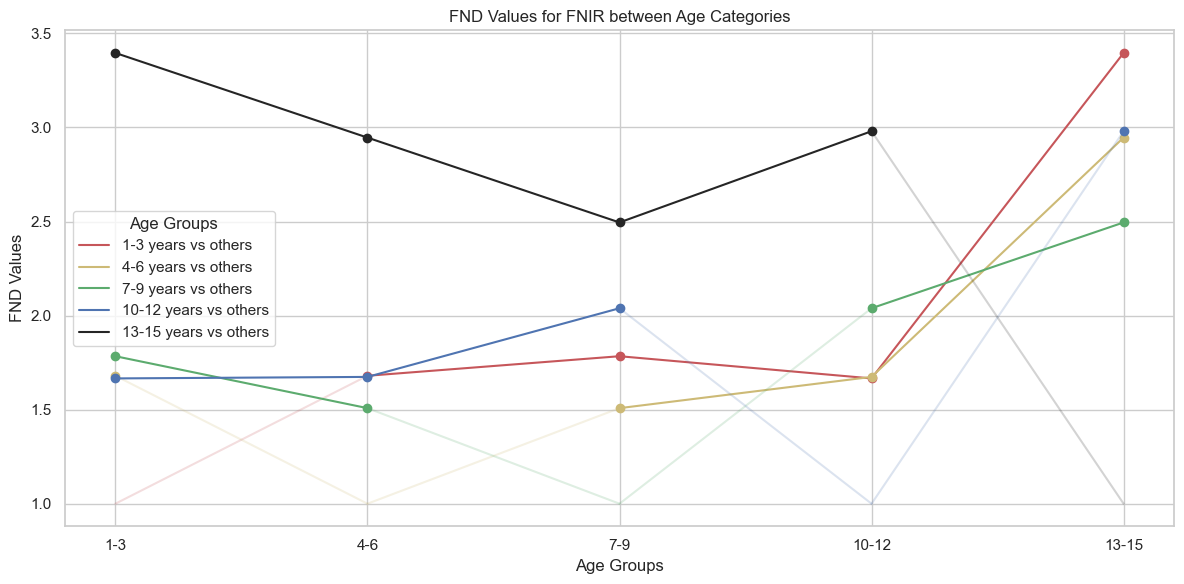

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define age categories and labels
age_categories = ['1_3', '4_6', '7_9', '10_12', '13_15']
age_labels = ['1-3', '4-6', '7-9', '10-12', '13-15']

# Define FND values
FND_values = {
    '1_3': FND_1_3,
    '4_6': FND_4_6,
    '7_9': FND_7_9,
    '10_12': FND_10_12,
    '13_15': FND_13_15
}

# Convert the data into a DataFrame for easier plotting
data = []
for key, values in FND_values.items():
    for i, value in enumerate(values):
        data.append([key, age_categories[i], value])

df = pd.DataFrame(data, columns=['Age Group', 'Comparison Age Group', 'FND Value'])

# Replace 1s with NaN to break the lines at those points
df['FND Value'] = df['FND Value'].replace(1, np.nan)

# Map the age categories to their labels for better readability
age_map = dict(zip(age_categories, age_labels))
df['Age Group'] = df['Age Group'].map(age_map)
df['Comparison Age Group'] = df['Comparison Age Group'].map(age_map)

# Define custom colors
custom_colors = {
    '1-3': '#C6565A',  # Muted red
    '4-6': '#CDBA76',  # Muted gold
    '7-9': '#5CAB6E',  # Muted green
    '10-12': '#4F74B1',  # Muted blue
    '13-15': '#252525'  # Muted gray
}

# Plotting using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plotting each age group with custom colors
for age_group in age_labels:
    subset = df[df['Age Group'] == age_group]

    # Plot the main lines without connections to 1s
    plt.plot(subset['Comparison Age Group'], subset['FND Value'], label=f'{age_group} years vs others', color=custom_colors[age_group])

    # Plot the muted connections separately
    for i in range(1, len(subset)):
        x_values = subset['Comparison Age Group'].iloc[i-1:i+1]
        y_values = subset['FND Value'].iloc[i-1:i+1].fillna(1)  # Temporarily fill NaN to plot muted line
        if 1 in y_values.values:
            plt.plot(x_values, y_values, color=custom_colors[age_group], alpha=0.2)

    # Plot markers separately, skipping the points where FND Value is NaN (formerly 1)
    for x, y in zip(subset['Comparison Age Group'], subset['FND Value']):
        if not pd.isna(y):
            plt.plot(x, y, 'o', color=custom_colors[age_group])

plt.xlabel('Age Groups')
plt.ylabel('FND Values')
plt.title('FND Values for FNIR between Age Categories')
plt.legend(title='Age Groups')
plt.tight_layout()
plt.show()


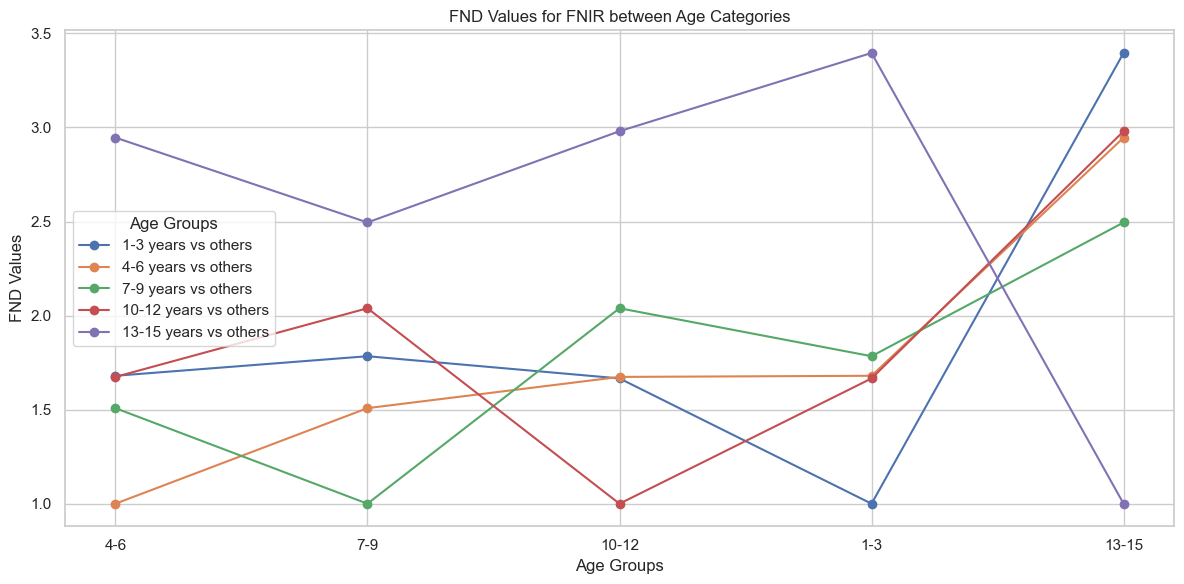

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define age categories and labels
age_categories = ['1_3', '4_6', '7_9', '10_12', '13_15']
age_labels = ['1-3', '4-6', '7-9', '10-12', '13-15']



# Convert the data into a DataFrame for easier plotting
data = []
for key, values in FND_values.items():
    for i, value in enumerate(values):
        data.append([key, age_categories[i], value])

df = pd.DataFrame(data, columns=['Age Group', 'Comparison Age Group', 'FND Value'])

# Map the age categories to their labels for better readability
age_map = dict(zip(age_categories, age_labels))
df['Age Group'] = df['Age Group'].map(age_map)
df['Comparison Age Group'] = df['Comparison Age Group'].map(age_map)

# Calculate the mean FND value for each Comparison Age Group
mean_fnd = df.groupby('Comparison Age Group')['FND Value'].mean().sort_values()

# Reorder the Comparison Age Groups based on the mean FND values
sorted_age_labels = mean_fnd.index.tolist()

# Plotting using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plotting each age group
for age_group in age_labels:
    subset = df[df['Age Group'] == age_group]
    subset = subset.set_index('Comparison Age Group').reindex(sorted_age_labels).reset_index()
    plt.plot(subset['Comparison Age Group'], subset['FND Value'], marker='o', label=f'{age_group} years vs others')

plt.xlabel('Age Groups')
plt.ylabel('FND Values')
# plt.yscale('log')
plt.title('FND Values for FNIR between Age Categories')
plt.legend(title='Age Groups')
plt.tight_layout()
plt.show()


In [33]:


t_statistic, p_value = stats.ttest_rel(df_all_results['FNIR_1_3'], df_all_results['FNIR_4_6'])

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 2.4138573218993145
P-value: 0.03900154168242499


In [34]:
t_statistic, p_value = stats.ttest_rel(df_all_results['FNIR_1_3'], df_all_results['FNIR_7_9'])

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 4.8877372755001955
P-value: 0.0008621161210172438


In [35]:
t_statistic, p_value = stats.ttest_rel(df_all_results['FNIR_1_3'], df_all_results['FNIR_10_12'])

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 8.202279954217817
P-value: 1.8121614004503953e-05


In [36]:
t_statistic, p_value = stats.ttest_rel(df_all_results['FNIR_1_3'], df_all_results['FNIR_13_15'])

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 10.20586239089448
P-value: 3.019234571557083e-06


In [37]:
t_statistic, p_value = stats.ttest_rel(df_all_results['FNIR_10_12'], df_all_results['FNIR_13_15'])

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 2.6139216959299754
P-value: 0.028089524739175902


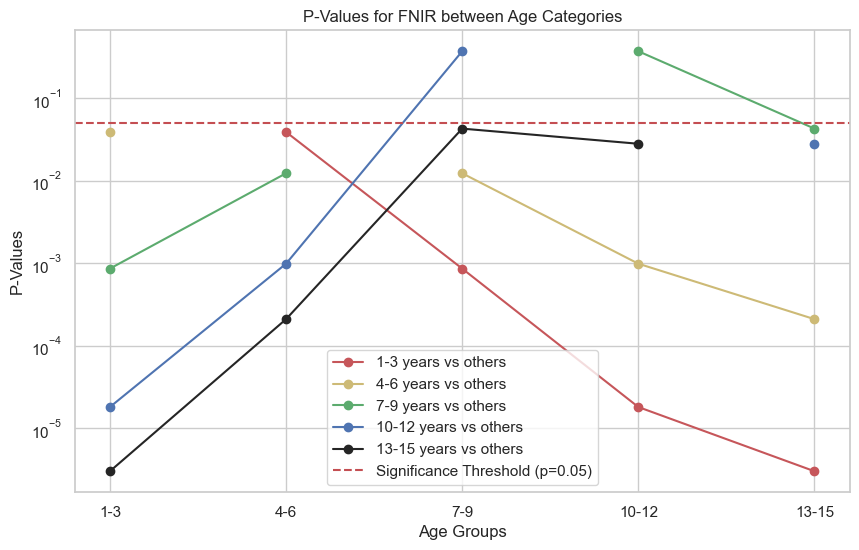

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming df_all_results is already loaded, if not, load it here
# df_all_results = pd.read_csv('path_to_your_data.csv')

# Define age categories for FNIR columns
age_categories = ['1_3', '4_6', '7_9', '10_12', '13_15']
age_labels = ['1-3', '4-6', '7-9', '10-12', '13-15']

# Define custom colors
custom_colors = {
    '1-3': '#C6565A',  # Muted red
    '4-6': '#CDBA76',  # Muted gold
    '7-9': '#5CAB6E',  # Muted green
    '10-12': '#4F74B1',  # Muted blue
    '13-15': '#252525'  # Muted gray
}

# Initialize an empty dictionary to store p-values
p_values_dict = {cat: [] for cat in age_categories}

# Calculate p-values between each pair of age categories
for i in range(len(age_categories)):
    for j in range(len(age_categories)):
        if i != j:
            t_statistic, p_value = stats.ttest_rel(df_all_results[f'FNIR_{age_categories[i]}'], df_all_results[f'FNIR_{age_categories[j]}'])
            p_values_dict[age_categories[i]].append(p_value)
        else:
            p_values_dict[age_categories[i]].append(None)

# Set the seaborn style
sns.set(style="whitegrid")

# Prepare to plot
plt.figure(figsize=(10, 6))

# Plot p-values for each age category pair
for i, cat in enumerate(age_categories):
    plt.plot(age_labels, p_values_dict[cat], marker='o', label=f'{cat.replace("_", "-")} years vs others', color=custom_colors[age_labels[i]])

# Add horizontal line at p-value = 0.05
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Threshold (p=0.05)')

# Add labels and title
plt.xlabel('Age Groups')
plt.ylabel('P-Values')
plt.title('P-Values for FNIR between Age Categories')
plt.legend()
plt.yscale('log')  # If you want to visualize small p-values better
plt.grid(True)

# Show plot
plt.show()


In [42]:
df

,Age Group,Comparison Age Group,FND Value
0,1-3,1-3,1.000
1,1-3,4-6,1.680
2,1-3,7-9,1.784
3,1-3,10-12,1.666
4,1-3,13-15,3.396
5,4-6,1-3,1.680
6,4-6,4-6,1.000
7,4-6,7-9,1.508
8,4-6,10-12,1.674
9,4-6,13-15,2.946


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming df_all_results is already loaded, if not, load it here
# df_all_results = pd.read_csv('path_to_your_data.csv')

# Define age categories for FNIR columns
age_categories = ['1_3', '4_6', '7_9', '10_12', '13_15']
age_labels = ['1-3', '4-6', '7-9', '10-12', '13-15']

# Initialize an empty dictionary to store p-values
p_values_dict = {cat: [] for cat in age_categories}

# Calculate p-values between each pair of age categories
for i in range(len(age_categories)):
    for j in range(len(age_categories)):
        if i != j:
            t_statistic, p_value = stats.ttest_rel(df_all_results[f'FND_{age_categories[i]}'], df_all_results[f'FND_{age_categories[j]}'])
            p_values_dict[age_categories[i]].append(p_value)
        else:
            p_values_dict[age_categories[i]].append(None)

# Set the seaborn style
sns.set(style="whitegrid")

# Prepare to plot
plt.figure(figsize=(10, 6))

# Plot p-values for each age category pair
for i, cat in enumerate(age_categories):
    plt.plot(age_labels, p_values_dict[cat], marker='o', label=f'{cat.replace("_", "-")} years vs others')

# Add horizontal line at p-value = 0.05
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Threshold (p=0.05)')

# Add labels and title
plt.xlabel('Age Groups')
plt.ylabel('P-Values')
plt.title('P-Values for FNIR between Age Categories')
plt.legend()
plt.yscale('log')  # If you want to visualize small p-values better
plt.grid(True)

# Show plot
plt.show()


KeyError: 'FND_1_3'

In [ ]:
def process_iterations(key_pattern, output_file, sim_mat_dict, iteration_range=range(1, 11)):
    # Initialize the list to hold the arrays
    iterations = []

    # Loop to access each array and append it to the list
    for i in iteration_range:
        key = f'{key_pattern}_{i}'
        if key in sim_mat_dict:
            iterations.append(sim_mat_dict[key])

    # Concatenate all arrays into one big array
    iterations_all = np.concatenate(iterations)
    iterations_all = pd.DataFrame(iterations_all)

    # Save to CSV
    iterations_all.to_csv(output_file, index=False)

    # Print the length of the big array
    print(len(iterations_all))


In [ ]:
# age = ['1-3','4-6','7-9','10-12','13-15']
# numbers = [1,2,3]

# process_iterations('sim_mat_c_enrolled_iteration', f'sim_mat_c_enrolled_iterations_all_ada_2_3_{age[0]}.csv', sim_mat_dict_all_magface_ex2_3_1)
# process_iterations('sim_mat_a_enrolled_iteration', f'sim_mat_a_enrolled_iterations_all_ada_2_3_{age[0]}.csv', sim_mat_dict_all_magface_ex2_3_1)
# process_iterations('sim_mat_c_non_enrolled_iteration', f'sim_mat_c_non_enrolled_iterations_all_ada_2_3_{age[0]}.csv', sim_mat_dict_all_magface_ex2_3_1)
# process_iterations('sim_mat_a_non_enrolled_iteration', f'sim_mat_a_non_enrolled_iterations_all_ada_2_3_{age[0]}.csv', sim_mat_dict_all_magface_ex2_3_1)

# process_iterations('sim_mat_c_enrolled_iteration', f'sim_mat_c_enrolled_iterations_all_ada_2_3_{age[1]}.csv', sim_mat_dict_all_magface_ex2_3_1)
# process_iterations('sim_mat_a_enrolled_iteration', f'sim_mat_a_enrolled_iterations_all_ada_2_3_{age[1]}.csv', sim_mat_dict_all_magface_ex2_3_1)
# process_iterations('sim_mat_c_non_enrolled_iteration', f'sim_mat_c_non_enrolled_iterations_all_ada_2_3_{age[1]}.csv', sim_mat_dict_all_magface_ex2_3_1)
# process_iterations('sim_mat_a_non_enrolled_iteration', f'sim_mat_a_non_enrolled_iterations_all_ada_2_3_{age[1]}.csv', sim_mat_dict_all_magface_ex2_3_1)

# process_iterations('sim_mat_c_enrolled_iteration', f'sim_mat_c_enrolled_iterations_all_ada_2_3_{age[2]}.csv', sim_mat_dict_all_magface_ex2_3_2)
# process_iterations('sim_mat_a_enrolled_iteration', f'sim_mat_a_enrolled_iterations_all_ada_2_3_{age[2]}.csv', sim_mat_dict_all_magface_ex2_3_2)
# process_iterations('sim_mat_c_non_enrolled_iteration', f'sim_mat_c_non_enrolled_iterations_all_ada_2_3_{age[2]}.csv', sim_mat_dict_all_magface_ex2_3_2)
# process_iterations('sim_mat_a_non_enrolled_iteration', f'sim_mat_a_non_enrolled_iterations_all_ada_2_3_{age[2]}.csv', sim_mat_dict_all_magface_ex2_3_2)

# process_iterations('sim_mat_c_enrolled_iteration', f'sim_mat_c_enrolled_iterations_all_ada_2_3_{age[3]}.csv', sim_mat_dict_all_magface_ex2_3_2)
# process_iterations('sim_mat_a_enrolled_iteration', f'sim_mat_a_enrolled_iterations_all_ada_2_3_{age[3]}.csv', sim_mat_dict_all_magface_ex2_3_2)
# process_iterations('sim_mat_c_non_enrolled_iteration', f'sim_mat_c_non_enrolled_iterations_all_ada_2_3_{age[3]}.csv', sim_mat_dict_all_magface_ex2_3_2)
# process_iterations('sim_mat_a_non_enrolled_iteration', f'sim_mat_a_non_enrolled_iterations_all_ada_2_3_{age[3]}.csv', sim_mat_dict_all_magface_ex2_3_2)

# process_iterations('sim_mat_c_enrolled_iteration', f'sim_mat_c_enrolled_iterations_all_ada_2_3_{age[4]}.csv', sim_mat_dict_all_magface_ex2_3_3)
# process_iterations('sim_mat_a_enrolled_iteration', f'sim_mat_a_enrolled_iterations_all_ada_2_3_{age[4]}.csv', sim_mat_dict_all_magface_ex2_3_3)
# process_iterations('sim_mat_c_non_enrolled_iteration', f'sim_mat_c_non_enrolled_iterations_all_ada_2_3_{age[4]}.csv', sim_mat_dict_all_magface_ex2_3_3)
# process_iterations('sim_mat_a_non_enrolled_iteration', f'sim_mat_a_non_enrolled_iterations_all_ada_2_3_{age[4]}.csv', sim_mat_dict_all_magface_ex2_3_3)


# age = ['1-3', '4-6', '7-9', '10-12', '13-15']
# datasets = {
#     0: sim_mat_dict_all_magface_ex2_3_1,
#     1: sim_mat_dict_all_magface_ex2_3_1,
#     2: sim_mat_dict_all_magface_ex2_3_2,
#     3: sim_mat_dict_all_magface_ex2_3_2,
#     4: sim_mat_dict_all_magface_ex2_3_3
# }

# key_patterns = [
#     'sim_mat_c_enrolled_iteration',
#     'sim_mat_a_enrolled_iteration',
#     'sim_mat_c_non_enrolled_iteration',
#     'sim_mat_a_non_enrolled_iteration'
# ]

# for idx, age_group in enumerate(age):
#     for key_pattern in key_patterns:
#         output_file = f'{key_pattern.split("_")[2]}_iterations_all_ada_2_3_{age_group}.csv'
#         process_iterations(key_pattern, output_file, datasets[idx])


23162
20602
423738
634410


In [ ]:
import pandas as pd
import numpy as np

def process_iterations(key_pattern, output_file, sim_mat_dict, iteration_range=range(1, 11)):
    iterations = []
    for i in iteration_range:
        key = f'{key_pattern}_{i}'
        if key in sim_mat_dict:
            iterations.append(sim_mat_dict[key])
    iterations_all = np.concatenate(iterations)
    iterations_all = pd.DataFrame(iterations_all)
    iterations_all.to_csv(output_file, index=False)
    print(len(iterations_all))

def descriptive_statistics(mated_scores, nonmated_scores):
    # Placeholder for your descriptive statistics function
    # Replace this with actual implementation
    stats = {
        "mean_mated": np.mean(mated_scores),
        "mean_nonmated": np.mean(nonmated_scores),
        "std_mated": np.std(mated_scores),
        "std_nonmated": np.std(nonmated_scores)
    }
    return pd.DataFrame([stats])

age = ['1-3', '4-6', '7-9', '10-12', '13-15']
datasets = {
    0: sim_mat_dict_all_magface_ex2_3_1,
    1: sim_mat_dict_all_magface_ex2_3_1,
    2: sim_mat_dict_all_magface_ex2_3_2,
    3: sim_mat_dict_all_magface_ex2_3_2,
    4: sim_mat_dict_all_magface_ex2_3_3
}

key_patterns = [
    'sim_mat_c_enrolled_iteration',
    'sim_mat_a_enrolled_iteration',
    'sim_mat_c_non_enrolled_iteration',
    'sim_mat_a_non_enrolled_iteration'
]

for idx, age_group in enumerate(age):
    for key_pattern in key_patterns:
        output_file = f'{key_pattern}_all_ada_2_3_{age_group}.csv'
        process_iterations(key_pattern, output_file, datasets[idx])

loaded_arrays = {}

for age_group in age:
    for key_pattern in key_patterns:
        filename = f'{key_pattern}_all_ada_2_3_{age_group}.csv'
        array_name = f'{key_pattern}_all_ada_{age_group.replace("-", "_")}'
        loaded_arrays[array_name] = pd.read_csv(filename).values.flatten()

# Example usage with descriptive statistics
results = {}

for age_group in age:
    mated_key = f'sim_mat_a_enrolled_iteration_all_ada_{age_group.replace("-", "_")}'
    nonmated_key = f'sim_mat_a_non_enrolled_iteration_all_ada_{age_group.replace("-", "_")}'
    if mated_key in loaded_arrays and nonmated_key in loaded_arrays:
        mated_scores = loaded_arrays[mated_key]
        nonmated_scores = loaded_arrays[nonmated_key]
        stats_system_df = descriptive_statistics(mated_scores, nonmated_scores)
        results[f'stats_system_{age_group.replace("-", "_")}'] = stats_system_df
        display(stats_system_df)

# Access specific results if needed
stats_system_1_3 = results['stats_system_1_3']
stats_system_4_6 = results['stats_system_4_6']
stats_system_7_9 = results['stats_system_7_9']
stats_system_10_12 = results['stats_system_10_12']
stats_system_13_15 = results['stats_system_13_15']


23162
20602
423738
634410
23162
20602
423738
634410
17992
13144
677502
501942
17992
13144
677502
501942
7022
23162
274113
423738


,mean_mated,mean_nonmated,std_mated,std_nonmated
0,0.492458,0.047669,0.173575,0.100277


,mean_mated,mean_nonmated,std_mated,std_nonmated
0,0.492458,0.047669,0.173575,0.100277


,mean_mated,mean_nonmated,std_mated,std_nonmated
0,0.516806,0.046307,0.185407,0.096341


,mean_mated,mean_nonmated,std_mated,std_nonmated
0,0.516806,0.046307,0.185407,0.096341


,mean_mated,mean_nonmated,std_mated,std_nonmated
0,0.440273,0.066647,0.177404,0.105072


# loader sim scores

In [ ]:
sim_mat_c_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_c_enrolled_iterations_all_ada_2_1.csv')).values.flatten()
sim_mat_a_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_a_enrolled_iterations_all_ada_2_1.csv')).values.flatten()
sim_mat_c_non_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_c_non_enrolled_iterations_all_ada_2_1.csv')).values.flatten()
sim_mat_a_non_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_a_non_enrolled_iterations_all_ada_2_1.csv')).values.flatten()


In [ ]:
from scipy.stats import describe, gaussian_kde
import math

def descriptive_statistics(mated_scores, nonmated_scores):
    stats_labels = ["Observations", "Minimum", "Maximum", "Mean", "St. Dev.", "Skewness", "Ex. Kurtosis"]
    mated_stats = describe(mated_scores)
    mated_stats = [mated_stats.nobs, mated_stats.minmax[0], mated_stats.minmax[1], mated_stats.mean, math.sqrt(mated_stats.variance), mated_stats.skewness, mated_stats.kurtosis]
    nonmated_stats = describe(nonmated_scores)
    nonmated_stats = [nonmated_stats.nobs, nonmated_stats.minmax[0], nonmated_stats.minmax[1], nonmated_stats.mean, math.sqrt(nonmated_stats.variance), nonmated_stats.skewness, nonmated_stats.kurtosis]

    stats_system_df = pd.DataFrame(np.array([stats_labels, mated_stats, nonmated_stats]).T, columns=["Statistic", "Mated", "Non-mated"])
    stats_system_df = stats_system_df.astype({"Statistic": str, "Mated": float, "Non-mated": float})
    return stats_system_df

In [ ]:
mated_scores1 = sim_mat_a_enrolled_iterations_all_ada
nonmated_scores1 = sim_mat_a_non_enrolled_iterations_all_ada
scores_type1 = "similarity"
stats_system1_df = descriptive_statistics(mated_scores1, nonmated_scores1)
display(stats_system1_df)

In [ ]:
mated_scores2 = sim_mat_c_enrolled_iterations_all_ada
nonmated_scores2 = sim_mat_c_non_enrolled_iterations_all_ada
scores_type2 = "similarity"
stats_system2_df = descriptive_statistics(mated_scores2, nonmated_scores2)
display(stats_system2_df)

In [ ]:
mated_colour = "green"
mated_label = "Mated scores"
nonmated_colour = "red"
nonmated_label = "Non-mated scores"

figure_size = (12,6)
alpha_shade = 0.25
alpha_fill = 1.0
linewidth = 2
legend_loc = "upper left"
legend_anchor = (1.0, 1.02)
legend_cols = 1
legend_fontsize = 12
label_fontsize = 16

threshold_colour = "black"
threshold_style = "--"
round_digits = 5
sns.set(style="white", palette="muted", color_codes=True)
plt.rc("axes", axisbelow=True)

In [ ]:

# import matplotlib.pyplot as plt
# import numpy as np

# def plot_histogram(mated_scores, nonmated_scores, normalise=True, savename=None, title="Histogram"):
#     def normalise_scores(distribution):
#         return np.ones_like(distribution) / len(distribution)

#     mated_mean = np.mean(mated_scores)

#     plt.figure(figsize=(10, 6))  # Replace 'figure_size' with a specific size if not defined

#     if normalise:
#         plt.hist(mated_scores, bins=50, weights=normalise_scores(mated_scores), color='green', alpha=0.5, label='Mated Scores')  # Replace 'mated_label' with 'Mated Scores'
#         plt.hist(nonmated_scores, bins=30, weights=normalise_scores(nonmated_scores), color='red', alpha=0.5, label='Non-mated Scores')  # Replace 'nonmated_label' with 'Non-mated Scores'
#         ylabel = "Probability Density"
#     else:
#         plt.hist(mated_scores, bins=50, color='green', alpha=0.5, label='Mated Scores')
#         plt.hist(nonmated_scores, bins=30, color='red', alpha=0.5, label='Non-mated Scores')
#         ylabel = "Count"

#     plt.axvline(mated_mean, color='darkgreen', linestyle='--', linewidth=2, label=f'Mated Mean: {mated_mean:.2f}')

#     plt.xlabel("Comparison Score", size=12)  # Replace 'label_fontsize' with 12 or any preferred size
#     plt.ylabel(ylabel, size=12)  # Replace 'label_fontsize' with 12 or any preferred size
#     plt.title(title, size=14)  # Title added here
#     plt.grid(True)
#     plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1, fontsize=10)  # Adjust legend parameters as needed

#     if savename is not None:
#         plt.savefig(savename, bbox_inches="tight")
#         plt.cla()
#         plt.clf()
#         plt.close()
#     else:
#         plt.show()


In [ ]:
from DET_utils.DET_plots import *



plot_histogram(mated_scores1, nonmated_scores1, normalise=True, title = 'Adults - AdaFace ex. 2.1 ')


In [ ]:
plot_histogram(mated_scores2, nonmated_scores2, normalise=True, title = 'Children - AdaFace ex. 2.1 ')


# DET curves


In [ ]:
from DET_utils.DET_plots import *

In [ ]:
# mated_kde, mated_pos, mated_min, mated_max = get_kde(mated_scores1)
# nonmated_kde, nonmated_pos, nonmated_min, nonmated_max = get_kde(nonmated_scores1)
# plt.figure(figsize=figure_size)
# plt.plot(mated_pos, mated_kde(mated_pos), linewidth=linewidth, color=mated_colour, label=mated_label)
# plt.plot(nonmated_pos, nonmated_kde(nonmated_pos), linewidth=linewidth, color=nonmated_colour, label=nonmated_label)
# plt.xlabel("Score", size=label_fontsize)
# plt.ylabel("Probability Density", size=label_fontsize)
# plt.grid(True)
# plt.legend(loc=legend_loc, bbox_to_anchor=legend_anchor, ncol=legend_cols, fontsize=legend_fontsize)
# plt.show()

In [ ]:
d_prime_system1 = d_prime(mated_scores1, nonmated_scores1)
print("d' child =", round(d_prime_system1, round_digits))

d_prime_system2 = d_prime(mated_scores2, nonmated_scores2)
print("d' adult =", round(d_prime_system2, round_digits))

# d_prime_system3 = d_prime(mated_scores3, nonmated_scores3)
# print("d' canonical =", round(d_prime_system3, round_digits))


In [ ]:
threshold1 = df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
kde_with_threshold(mated_scores1, nonmated_scores1, scores_type1, threshold1)

In [ ]:
threshold2 = df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
kde_with_threshold(mated_scores2, nonmated_scores2, scores_type2, threshold2)

In [ ]:
system_name1 = 'Adults'
system_name2 = 'Children'

det = DET(biometric_evaluation_type='identification', abbreviate_axes=True, plot_eer_line=True, plot_title="Children vs adults")
det.x_limits = np.array([1e-4, .5])
det.y_limits = np.array([1e-4, .5])
det.x_ticks = np.array([1e-3, 1e-2, 5e-2, 20e-2, 40e-2])
det.x_ticklabels = np.array(['0.1', '1', '5', '20', '40'])
det.y_ticks = np.array([1e-3, 1e-2, 5e-2, 20e-2, 40e-2])
det.y_ticklabels = np.array(['0.1', '1', '5', '20', '40'])
det.create_figure()
det.plot(tar=adjust_scores_for_DET(mated_scores1, scores_type1), non=adjust_scores_for_DET(nonmated_scores1, scores_type1), label=system_name1)
det.plot(tar=adjust_scores_for_DET(mated_scores2, scores_type2), non=adjust_scores_for_DET(nonmated_scores2, scores_type2), label=system_name2)
det.legend_on(loc="upper right")
det.show()